In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import os
from scipy.signal import welch

In [2]:
folder='EMG_data_for_gestures-master'
dirlist = os.listdir(folder)
dirlist.remove('README.txt')
l = []
order=[]
for dirn in dirlist:
    for file in os.listdir(folder + '/' + dirn):
        df = pd.read_csv(folder + '/' + dirn + '/' + file, sep='\t')
        l.append(df)
        order.append((dirn,file))
#trash dataframe (inconsistent labeling, jeapordizes data integrity)
l.pop(63)
order.pop(63)
gestdict={
1 : 'hand at rest', 
2 : 'hand clenched in a fist', 
3 : 'wrist flexion',
4 : 'wrist extension',
5 : 'radial deviations',
6 : 'ulnar deviations'}

In [3]:
# Remove non-gesture data
def only_gestures(df):
    df=df[~df['class'].isin([0,7])]
    return df

In [5]:
# data transformations
m=[only_gestures(x) for x in l]
u=[]
for frame in m:
    t=[]
    for gesture in [frame[frame['class']==gest] for gest in [1,2,3,4,5,6]]:
        s=[]
        #split gesture sessions
        for splittime in [gesture[gesture['time']<gesture['time'].mean()],
                          gesture[gesture['time']>gesture['time'].mean()]]:
            r=[]
            # create sampling intervals
            for timebin in ([splittime[len(splittime)//14*i:len(splittime)
                                       //14*i+len(splittime)//14] for i in np.arange(0,14)]):
                q=[]
                #each channel
                for channel in timebin.columns[1:9]:
                    # Welch transformation
                    w=welch(timebin[channel])
                    freq=w[0][w[1].argmax()]
                    q.append(freq)
                    # Magnitude transformation
                    mag = timebin[channel].max()-timebin[channel].min()
                    q.append(mag)
                q.append(timebin['class'].iloc[0])
                r.append(q)
            s.append(r)
        t.append(r)
    u.append(t)
del t,s,r,q

/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg = 132
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 142, using nperseg = 142
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 124, using nperseg = 124
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))


/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 93, using nperseg = 93
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 104, using nperseg = 104
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 105, using nperseg = 105
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 129, using nperseg = 129
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 107, using nperseg = 107
  .format(nperseg, input_length))
/h

/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 216, using nperseg = 216
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 189, using nperseg = 189
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 229, using nperseg = 229
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 225, using nperseg = 225
  .format(nperseg, input_length))
/home/poxlox/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 192, using nperseg = 192
  .format(nperseg, input_length))


In [ ]:
# each frame
## each gesture
### 

In [6]:
z=u.copy()
combos=[]
# create data combos
for idx in range(0,60,2):
    u=z.copy()
    test_participant=[u.pop(idx)]
    test_participant.append(u.pop(idx))
    combos.append([u,test_participant])
#same thing but with disjoint due to bad data
for idx in range(63,69,2):
    u=z.copy()
    test_participant=[u.pop(idx)]
    test_participant.append(u.pop(idx))
    combos.append([u,test_participant])

In [ ]:
# combos structure
# a particular combination of a single withheld participant
# # 
# # # 
# # # # each gesture
# # # # # 8 pseudo-mags, 8 frequencies, 1 target

In [28]:
combos[0][0][5][0][0]

[0.031746031746031744,
 2e-05,
 0.0,
 8e-05,
 0.007936507936507936,
 0.00013,
 0.023809523809523808,
 0.00035999999999999997,
 0.007936507936507936,
 0.0001,
 0.007936507936507936,
 0.00023,
 0.007936507936507936,
 7.999999999999999e-05,
 0.015873015873015872,
 4e-05,
 1]

In [7]:
trscore=[]
tescore=[]
wiscore=[]
trfailmat=[]
tefailmat=[]
wifailmat=[]
for cycle, thing in enumerate(combos):
    v=[]
    x=[]
    for session in thing[0]:
        v.append(np.concatenate(session,axis=0)) 
    for session in thing[1]:
        x.append(np.concatenate(session,axis=0)) 
    
    targets=[a[:,-1] for a in v] 
    nX = np.concatenate([StandardScaler().fit_transform(a[:,:-1]) 
    for a in v], axis=0)
    ny = np.concatenate(targets,axis=0)
    
    test_participant_targets=[a[:,-1] for a in x]
    ntest_participant_X=np.concatenate([StandardScaler().fit_transform(a[:,:-1]) 
                                                                       for a in x],
                                 axis=0)
    ntest_participant_y=np.concatenate(test_participant_targets, axis=0)
    
    X_train, X_test, y_train,y_test = train_test_split(nX, ny)
    rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
    rf.fit(X_train,y_train)
    
    
    aa=rf.predict(X_train)
    ab=rf.predict(X_test)
    ac=rf.predict(ntest_participant_X)
    aa.shape=(aa.shape[0],1)
    ab.shape=(ab.shape[0],1)
    ac.shape=(ac.shape[0],1)
    y_train.shape=(y_train.shape[0],1)
    y_test.shape=(y_test.shape[0],1)
    ntest_participant_y.shape=(ntest_participant_y.shape[0],1)
    trfailmat.append(np.concatenate([y_train,aa,aa-y_train],axis=1))
    tefailmat.append(np.concatenate([y_test,ab,ab-y_test],axis=1))
    wifailmat.append(np.concatenate([ntest_participant_y,ac,ac-ntest_participant_y],axis=1))

    trscore.append(float(rf.score(X_train,y_train)))
    tescore.append(float(rf.score(X_test,y_test)))
    wiscore.append(float(rf.score(ntest_participant_X, ntest_participant_y)))


In [8]:
ohmy=[]
for thing in wifailmat:
    q=[]
    errors=thing[thing[:,2]!=0]
    err=pd.DataFrame(errors,columns=['tru', 'pred', 'diff'])#careful, reversed
    err.sort_values(by=['tru'])
    q.append(err.groupby(by=['tru','pred'])['pred'].count().sort_values()[-3:])
    q.append(err.groupby(by=['tru','pred'])['pred'].count().sort_values()[-3:].index.get_level_values(0))
    q.append(err.groupby(by=['tru','pred'])['pred'].count().sort_values()[-3:].index.get_level_values(1))
    ohmy.append(q)
    # errors=errorcheck[errorcheck[:,2]!=0]
# err=pd.DataFrame(errors,columns=['pred', 'tru', 'diff'])
# err.sort_values(by=['tru'])
# err.groupby(by=['tru','pred'])['pred'].count().sort_values()

In [217]:
ohmy

[[tru  pred
  4.0  5.0     11
  1.0  3.0     16
  5.0  4.0     24
  Name: pred, dtype: int64,
  Float64Index([4.0, 1.0, 5.0], dtype='float64', name='tru'),
  Float64Index([5.0, 3.0, 4.0], dtype='float64', name='pred')],
 [tru  pred
  5.0  3.0     3
  1.0  5.0     5
       3.0     7
  Name: pred, dtype: int64,
  Float64Index([5.0, 1.0, 1.0], dtype='float64', name='tru'),
  Float64Index([3.0, 5.0, 3.0], dtype='float64', name='pred')],
 [tru  pred
  6.0  3.0     4
  5.0  4.0     5
  1.0  5.0     6
  Name: pred, dtype: int64,
  Float64Index([6.0, 5.0, 1.0], dtype='float64', name='tru'),
  Float64Index([3.0, 4.0, 5.0], dtype='float64', name='pred')],
 [tru  pred
  3.0  5.0     5
  4.0  5.0     5
  3.0  2.0     9
  Name: pred, dtype: int64,
  Float64Index([3.0, 4.0, 3.0], dtype='float64', name='tru'),
  Float64Index([5.0, 5.0, 2.0], dtype='float64', name='pred')],
 [tru  pred
  4.0  5.0     2
  6.0  1.0     4
  5.0  4.0     6
  Name: pred, dtype: int64,
  Float64Index([4.0, 6.0, 5.0], dtype=

In [10]:
sic=[]
for pred in range(1,7):
    for tru in range(1,7):
        count=0
        for place in ohmy:
            if place[1][-1]==tru:
                if place[2][-1]==pred:
                    count+=place[0][-1]
        sic.append(((pred,tru),count))


In [11]:
sic=np.array(sic)

In [12]:
plotter=sic[sic[:,1]!=0]

Text(0.5, 0.98, 'Score per witheld participant')

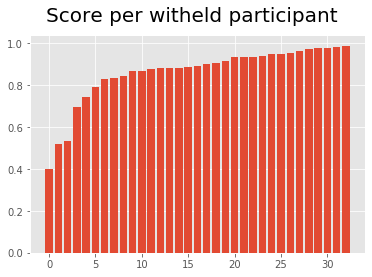

In [24]:
plt.bar(np.arange(len(wiscore)),wiscore)
plt.style.use('ggplot')
plt.suptitle('Score per witheld participant',size=20)

In [17]:
wiscore

[0.39880952380952384,
 0.5178571428571429,
 0.5357142857142857,
 0.6964285714285714,
 0.7440476190476191,
 0.7916666666666666,
 0.8273809523809523,
 0.8333333333333334,
 0.8452380952380952,
 0.8690476190476191,
 0.8690476190476191,
 0.875,
 0.8809523809523809,
 0.8809523809523809,
 0.8809523809523809,
 0.8869047619047619,
 0.8928571428571429,
 0.8988095238095238,
 0.9047619047619048,
 0.9166666666666666,
 0.9345238095238095,
 0.9345238095238095,
 0.9345238095238095,
 0.9404761904761905,
 0.9464285714285714,
 0.9464285714285714,
 0.9523809523809523,
 0.9642857142857143,
 0.9702380952380952,
 0.9761904761904762,
 0.9761904761904762,
 0.9821428571428571,
 0.9880952380952381]

In [250]:
plotter

array([[(2, 3), 9],
       [(2, 6), 2],
       [(3, 1), 7],
       [(3, 2), 20],
       [(3, 6), 60],
       [(4, 2), 3],
       [(4, 5), 74],
       [(4, 6), 28],
       [(5, 1), 6],
       [(5, 2), 2],
       [(5, 4), 28],
       [(6, 2), 10],
       [(6, 3), 34]], dtype=object)

In [239]:
ohmy[0][1]

Float64Index([4.0, 1.0, 5.0], dtype='float64', name='tru')

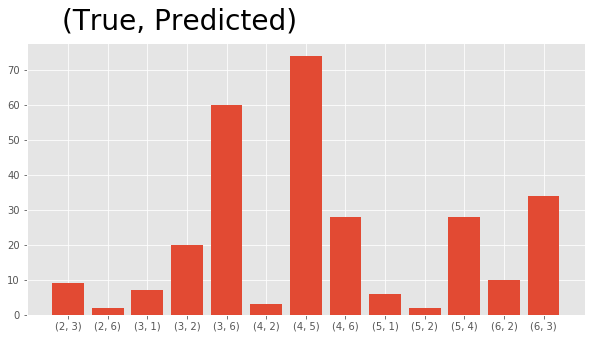

In [268]:
fig,ax=plt.subplots(1,figsize=(10,5))
plt.bar(np.arange(len(plotter)),plotter[:,1])
plt.xticks(np.arange(len(plotter)),plotter[:,0])
plt.suptitle('(True, Predicted)',size=28,ha='right')
plt.style.use('ggplot')
# plt.constrained_layout()


<BarContainer object of 33 artists>

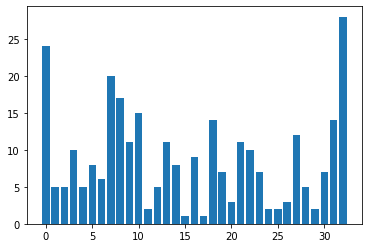

In [13]:
plt.bar(range(len(ohmy)),[c[0][-1] for c in ohmy])

In [269]:
gestdict

{1: 'hand at rest',
 2: 'hand clenched in a fist',
 3: 'wrist flexion',
 4: 'wrist extension',
 5: 'radial deviations',
 6: 'ulnar deviations'}

In [206]:
damn=[]
for oh in ohmy:
    q=[]
    q.append(oh.groupby(by=['tru','pred']).count()[-3:])
    q.append(oh.groupby(by=['tru','pred'])['pred'].count().sort_values()[-3:].index.get_level_values(0))
    q.append(oh.groupby(by=['tru','pred'])['pred'].count().sort_values()[-3:].index.get_level_values(1))

KeyError: 'Column not found: pred'

In [212]:
# err.groupby(by=['tru','pred']).get_level_values(0)
err.groupby(by=['tru','pred'])['pred'].count().sort_values()[-3:].index.get_level_values(1)
# err.groupby(by=['tru','pred']).count()[-3:].get_level_values(0)
# err.groupby(by=['tru','pred']).count()[-3:].get_level_values(1)

Float64Index([6.0, 5.0, 4.0], dtype='float64', name='pred')

In [208]:
err.groupby(by=['tru','pred'])['pred'].count().sort_values()[-3:].index.get_level_values(0)
# [-3:].index.get_level_values(0)

Float64Index([3.0, 4.0, 6.0], dtype='float64', name='tru')

In [211]:
err.groupby(by=['tru','pred'])['pred'].count().sort_values()
# get the count and placement of the 3 most common mishaps


tru  pred
4.0  2.0      1
5.0  3.0      3
2.0  6.0     12
     3.0     15
3.0  6.0     17
4.0  5.0     21
6.0  4.0     28
Name: pred, dtype: int64

In [ ]:
a=np.array(wiscore)

In [ ]:
fig,ax=plt.subplots(1,figsize=(10,6))
plt.suptitle('RF model accuracy on each witheld participant'.title(), size=28)
plt.bar(np.arange(len(a)),
        a[a.argsort()]*100)
plt.style.use('ggplot')

In [78]:
x,y=1

TypeError: cannot unpack non-iterable int object

In [58]:
a[:,2][:,1]

array(['0.5', '0.8928571428571429', '0.8988095238095238',
       '0.8452380952380952', '0.9166666666666666', '0.8690476190476191',
       '0.9285714285714286', '0.7559523809523809', '0.5476190476190477',
       '0.8869047619047619', '0.7857142857142857', '0.9702380952380952',
       '0.8809523809523809', '0.8333333333333334', '0.8809523809523809',
       '0.9642857142857143', '0.9464285714285714', '0.9880952380952381',
       '0.8452380952380952', '0.8809523809523809', '0.9523809523809523',
       '0.8928571428571429', '0.8511904761904762', '0.9583333333333334',
       '0.9821428571428571', '0.9583333333333334', '0.9523809523809523',
       '0.8869047619047619', '0.9166666666666666', '0.9880952380952381',
       '0.9226190476190477', '0.6726190476190477', '0.4226190476190476'],
      dtype='<U18')

In [56]:
scores

[[('train score ', 1.0),
  ('test score', 0.9054520358868184),
  ('witheld score', 0.5)],
 [('train score ', 1.0),
  ('test score', 0.8895790200138026),
  ('witheld score', 0.8928571428571429)],
 [('train score ', 1.0),
  ('test score', 0.9075224292615597),
  ('witheld score', 0.8988095238095238)],
 [('train score ', 1.0),
  ('test score', 0.9026915113871635),
  ('witheld score', 0.8452380952380952)],
 [('train score ', 1.0),
  ('test score', 0.9054520358868184),
  ('witheld score', 0.9166666666666666)],
 [('train score ', 1.0),
  ('test score', 0.9151138716356108),
  ('witheld score', 0.8690476190476191)],
 [('train score ', 1.0),
  ('test score', 0.8861283643892339),
  ('witheld score', 0.9285714285714286)],
 [('train score ', 1.0),
  ('test score', 0.9061421670117322),
  ('witheld score', 0.7559523809523809)],
 [('train score ', 0.9993098688750862),
  ('test score', 0.9164941338854382),
  ('witheld score', 0.5476190476190477)],
 [('train score ', 1.0),
  ('test score', 0.89786059351

In [ ]:
aws for big data techniques
spark for big data again2
data not big enough up until then
dimensionality reduction with big data makes sense

